# **House Price Prediction - Regression Analysis**

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYT42UxGdsIqYrsT9qEpT0t79fO5T3FlrR8cJP9K4VuKa-qhp16A&s)

## **1. Defining the Question**
### **a) Specifying the Question**
As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 


### **b) Defining the Metric for Success**
A model that accurately predicts the sale of prices upon being provided with the predictor variables.

**Regression techniques**
*  Multiple Linear Regression
*  Quantile Regression
*  Ridge Regression
*  Lasso Regression
*  Elastic Net Regression

### **c) Understanding the context**
Tasked to study the factors that affect housing prices using the given information on real estate properties collected over the past few months. Later to, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### **Dataset Glossary**

*   Id
*   price  - Price of the house
*   bedrooms - Number of Bedrooms
*   bathrooms - Number of Bathrooms
*   sqft_living - Square feet area of living area
*   sqft_lot  - Square feet area of parking Layout
*   floors - Number of Floors
*   waterfront - Whether waterfront is there or not
*   view - Number of Views
*   grade - Grades
*   sqft_above
*   sqft_basement - Square feet area off basement
*   yr_built - Year the house is built
*   yr_renovated - Year the house is renovated
*   zipcode - zipcode os the house
*   lat : Latitude of the house
*   lon : Longitude of the house
*   sqft_living15
*   sqft_lot15

### **d) Recording the Experimental Design**

*  Explore given dataset
*  Define the appropriateness of the available data to answer the given question.
*  Find and deal with outliers, anomalies, and missing data within the dataset.
*  Perform univariate, bivariate and multivariate analysis recording your observations.
*  Performing regression analysis.
*  Incorporate categorical independent variables into your models.
*  Check for multicollinearity
*  Provide a recommendation based on your analysis. 
*  Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
*  Challenge your solution by providing insights on how you can make improvements in model improvement.



## **2. Reading the Data**

In [0]:
# Import Libraries

# Analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
# We will use the python package statsmodels for Quantile Regression
import statsmodels.formula.api as smf
from scipy import stats

# Other libraries
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Load datasets
mahao = pd.read_csv('house_data.csv')
mahao.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## **3. Exploring our data**

In [0]:
# Determining the shape of our dataset
print('Shape of our dataset: ' + str(mahao.shape))

Shape of our dataset: (21613, 20)


> Our dataset has 21613 rows and 20 columns

In [0]:
# Dataset information
print('Information about our dataset: \n')
mahao.info()

Information about our dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB



> Our data is numerical, since we have no column with an object datatype

In [0]:
## Ccount of different types of objects.
mahao.get_dtype_counts()

float64     5
int64      15
dtype: int64

In [0]:
# Statistiscal description of the dataset
mahao.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **4. Tidying the dataset**

In [0]:
# Check for missing data
mahao.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
# Drop unnecessary columns
mahao = mahao.drop('id', 1)

In [0]:
# Displaying in totals and percentages of missing values
def missing_percentage(mahao): # This function takes the df as input and returns two columns, totals and percentage
    total = mahao.isnull().sum().sort_values(ascending = False)[mahao.isnull().sum().sort_values(ascending = False) != 0] # Total column
    percent = round(mahao.isnull().sum().sort_values(ascending = False)/len(mahao)*100,2)[round(mahao.isnull().sum().sort_values
                                                                                                (ascending = False)/len(mahao)*100,2) != 0] # Percentage column
    return pd.concat([total, percent], axis=1, keys=['Total','Percentage'])

missing_percentage(mahao)

,Total,Percentage


> There were no missing values in any columns

In [0]:
# Check for duplicated data
mahao.duplicated().any()

True



> This indicates presence of duplicated record; we should investigate and find out how many and also which ones



In [0]:
# Display the duplicated records
mahao_dabo = mahao[mahao.duplicated( keep=False)]
print("Duplicate Rows on all columns are:")
print(mahao_dabo)

Duplicate Rows on all columns are:
          price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
547    259950.0         2       2.00  ... -122.357           1070         928
3950   550000.0         4       1.75  ... -122.088           2520       14789
3951   550000.0         4       1.75  ... -122.088           2520       14789
4352   259950.0         2       2.00  ... -122.357           1070         928
14982  585000.0         3       2.50  ... -122.172           2290        7984
14983  585000.0         3       2.50  ... -122.172           2290        7984
19636  529500.0         3       2.25  ... -122.402           1510        1352
20053  555000.0         3       2.50  ... -122.093           1880        3078
20054  555000.0         3       2.50  ... -122.093           1880        3078
20524  529500.0         3       2.25  ... -122.402           1510        1352

[10 rows x 19 columns]



> After a close look, we observe the duplicated rows and we drop them



In [0]:
# Drop duplicated rows 
mahao.drop_duplicates(keep = False, inplace = True) 

In [0]:
# Confirm if there's any more duplicated record
mahao.duplicated().any()

False


> All duplicated records have been dropped


## **5. EDA**

### **a. Univariate Analysis**

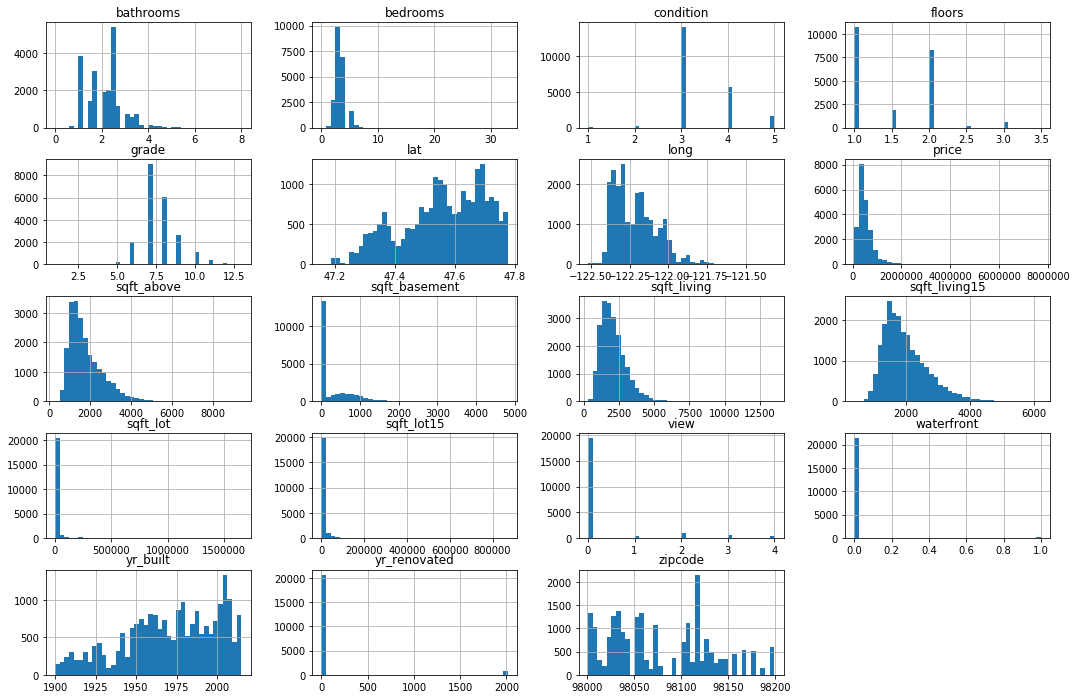

In [0]:
# Histograms
mahao.hist(bins=40, figsize=(18,12))
plt.show()

Our target variable is **Price** we will create a fivethirtyeight plot using matplotlib that will enable us to focus on the distribution of price across our dataset before we do our regression analysis

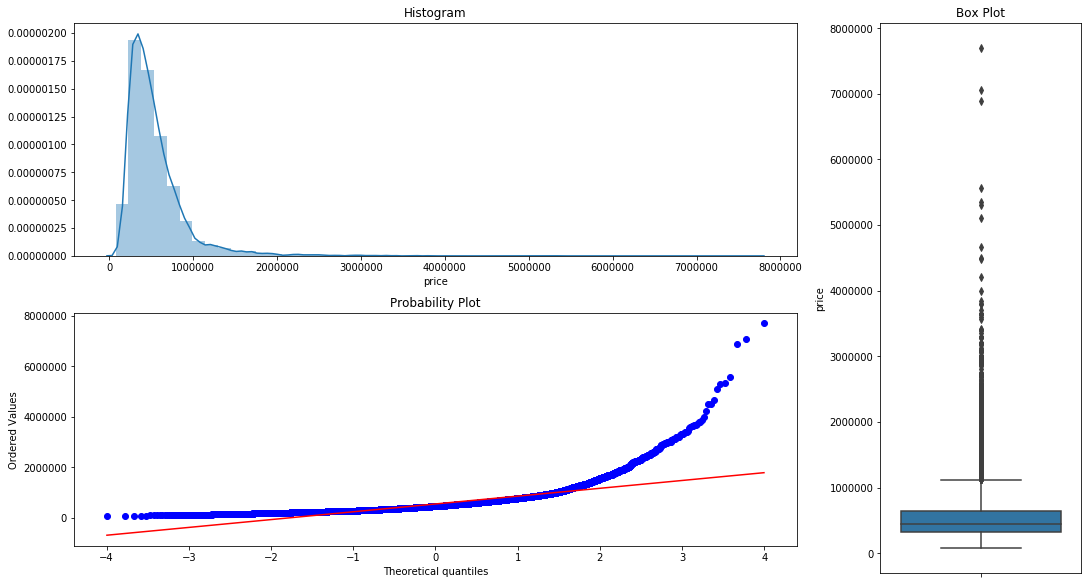

In [0]:
def plot_chart(mahao, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(mahao.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('Probablity Plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(mahao.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(mahao.loc[:,feature], orient='v', ax = ax3 );
    
plot_chart(mahao, 'price')


> We can observe that our price variable is not normally distributed, it is skewed to the right meaning more houses range between 0 to 1000000. 


> The box plot also shows that the mean of the price is about 500000 with afew outliers across the price range

In [0]:
#skewness and kurtosis
print("Skewness: " + str(mahao['price'].skew()))
print("Kurtosis: " + str(mahao['price'].kurt()))

Skewness: 4.020993593706033
Kurtosis: 34.50832329982184


As we see, the target variable price is not normally distributed.
This can reduce the performance of the ML regression models because linear regression assumes normal distribution.

Therfore we make a log transformation. Log transformation works best on data that is skewed to the right. 

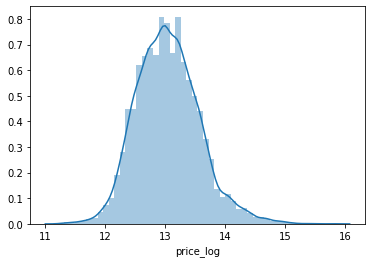

In [0]:
# Log transformation
mahao['price_log'] = np.log(mahao['price'])

# Plot the distribution plot
sns.distplot(mahao['price_log']);

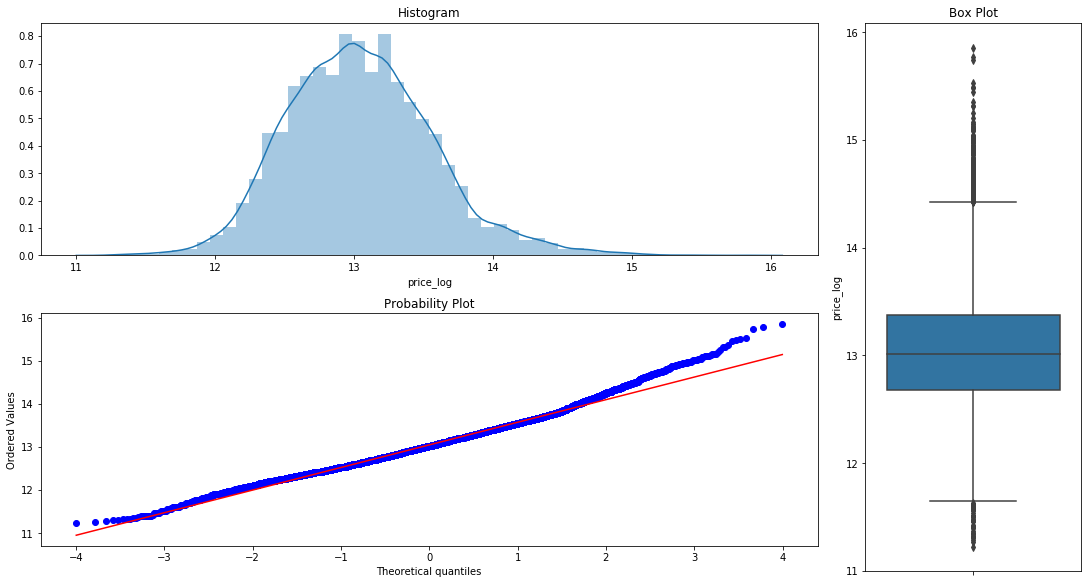

In [0]:
def plot_chart(mahao, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(mahao.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('Probablity Plot')
    ## Plotting the Prob plot. 
    stats.probplot(mahao.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(mahao.loc[:,feature], orient='v', ax = ax3 );
    
plot_chart(mahao, 'price_log')



> After transformation we can see that the price has taken on a normal distribution



In [0]:
# Check skewness and kurtosis
print("Skewness: %f" % mahao['price_log'].skew())
print("Kurtosis: %f" % mahao['price_log'].kurt())

# dropping old column
mahao.drop('price', axis= 1, inplace=True)

Skewness: 0.429147
Kurtosis: 0.691852




> The values of skewness and kurtosis have reduced which is great as compared to the previous values before transformation



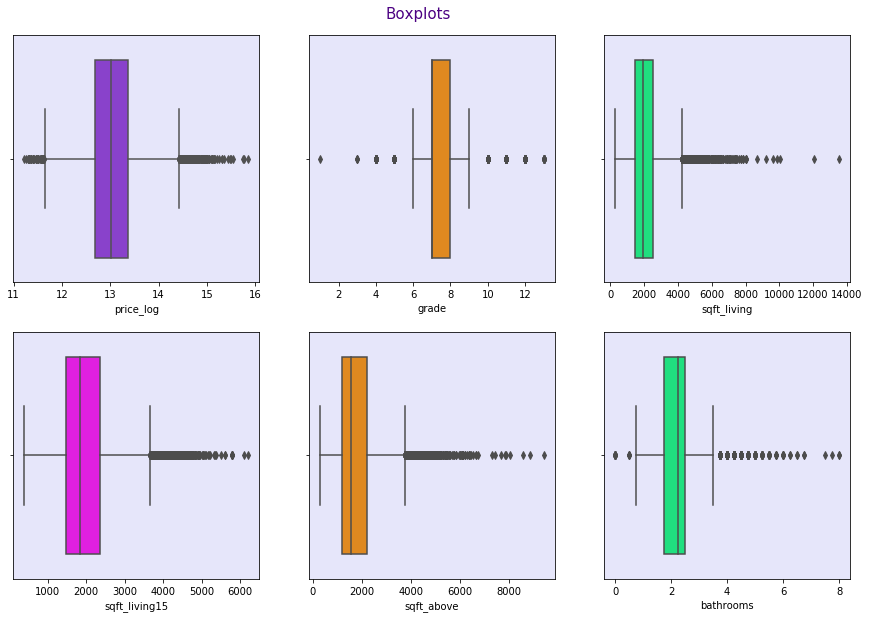

In [0]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['price_log', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms']
colors = ['blueviolet', 'darkorange', 'springgreen', 'fuchsia', 'darkorange', 'springgreen']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), mahao, col_list, colors):
  sns.boxplot(mahao[column], ax = ax, color = color)
  ax.set_facecolor('lavender') # Setting the background color to lavender

### **b. Bivariate Analysis**

In [0]:
# Find the correlations of the target variables with the rest of the features 
(mahao.corr()**2)["price_log"].sort_values(ascending = False)[1:]

grade            0.495459
sqft_living      0.483563
sqft_living15    0.383550
sqft_above       0.362142
bathrooms        0.303425
lat              0.201702
view             0.120207
bedrooms         0.117997
sqft_basement    0.100561
floors           0.096521
waterfront       0.030490
yr_renovated     0.013110
sqft_lot         0.009926
sqft_lot15       0.008389
yr_built         0.006516
long             0.002479
condition        0.001564
zipcode          0.001458
Name: price_log, dtype: float64

> The variables are sorted in a descending order starting with the most correlated one being sqft_living. 

> We can plot it in a scatter plot and see how it looks.


**Scatterplots**

In [0]:
# Create a function for the scatterplot
def scat_plot(y, x):
        ## Sizing the plot.
    plt.subplots(figsize = (10,7))
    ## Plotting target variable with predictor variable
    sns.scatterplot(y = y, x = x);

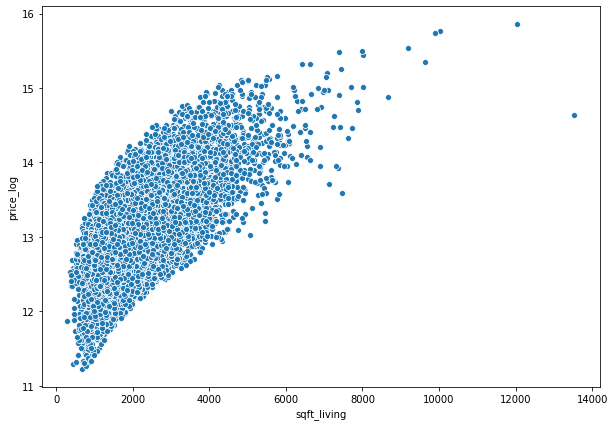

In [0]:
# sqft_living vs price
scat_plot(mahao.price_log, mahao.sqft_living)



> sqft_living and price are clearly highly correlated



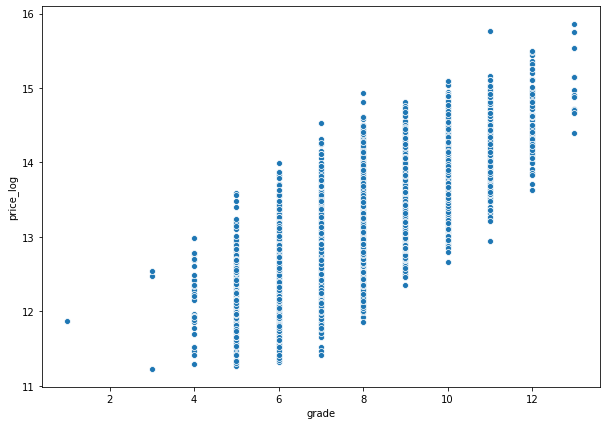

In [0]:
# grade vs price
scat_plot(mahao.price_log, mahao.grade)



> We can observe that as the grade increses, the prices also increase



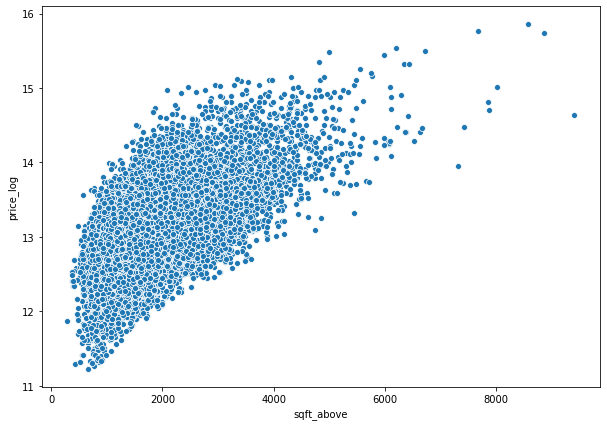

In [0]:
# sqft_above vs price
scat_plot(mahao.price_log, mahao.sqft_above)



> sqft above is also correlated with price except for a few outliers which we investigate further



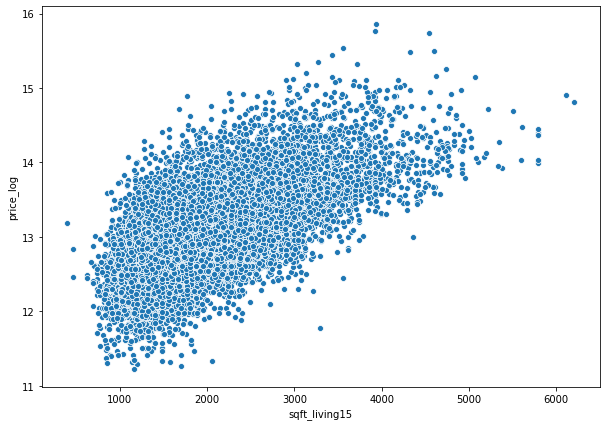

In [0]:
# Price vs sqft_living15
scat_plot(mahao.price_log, mahao.sqft_living15)

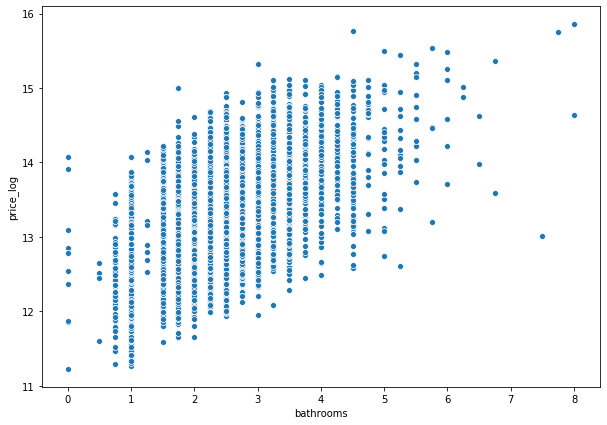

In [0]:
# Price vs Bathrooms
scat_plot(mahao.price_log, mahao.bathrooms)

**Relation of features to target (price_log)**

In [0]:
mahao.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price_log'],
      dtype='object')

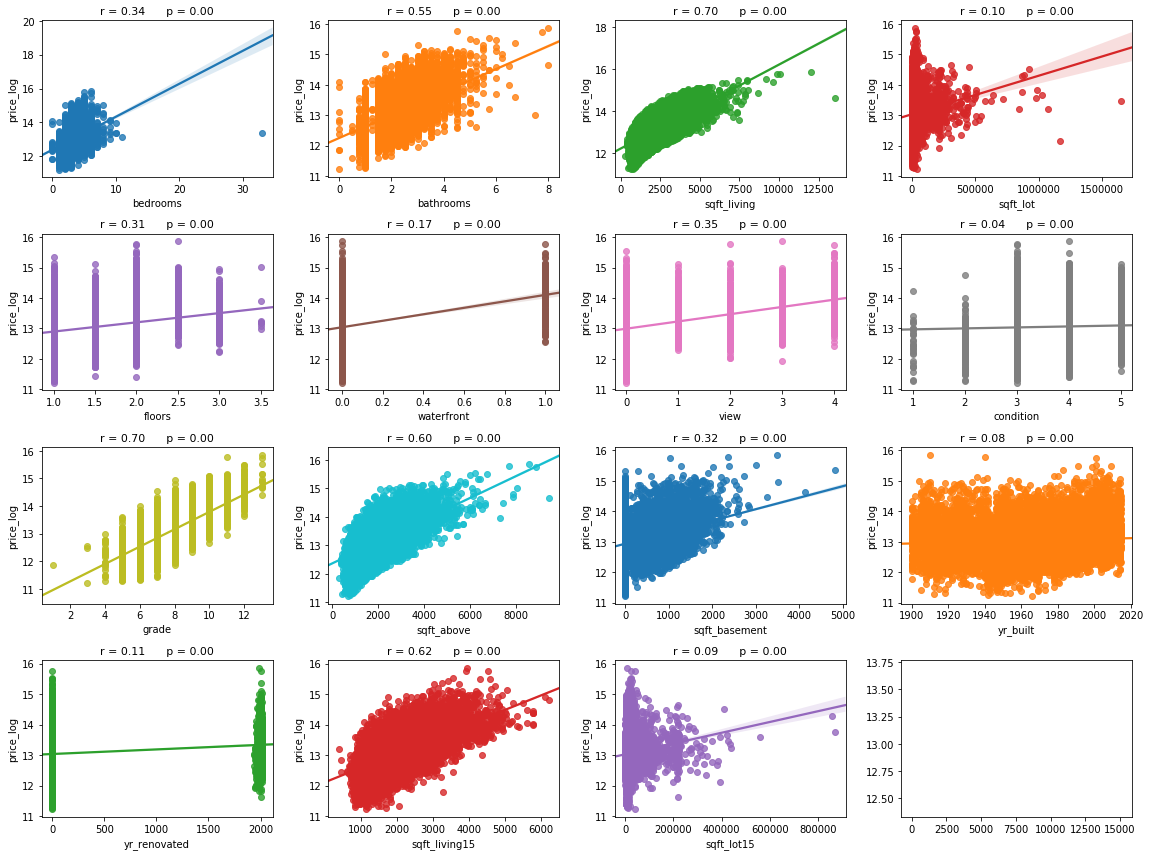

In [0]:
# Plots of relation to target for all features
target = 'price_log'
feat = mahao.drop('price_log',1)
rows = 4
cols = 4

fig, axs = plt.subplots(rows, cols, figsize=(cols*4,rows*3))

li_feats = list(feat)
li_not_plot = ['id', 'price_log', 'lat', 'long', 'zipcode']
li_plot_num_feats = [c for c in list(feat) if c not in li_not_plot]


for r in range(0,rows):
    for c in range(0,cols):  
        i = r*cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(mahao[li_plot_num_feats[i]], mahao[target], ax = axs[r][c])
            stp = stats.pearsonr(mahao[li_plot_num_feats[i]], mahao[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   



> From the plot we can get an instant look on the features that are related to the target and those that are not so much related to the target variable



## **6. Regression Analysis**

### **Multilinear Regression**

Linear regression is an analysis that assesses whether one or more predictor variables explain the dependent (criterion) variable.  

The regression has five key assumptions:

*  Linear relationship
*  Multivariate normality
*  No or little multicollinearity
*  No auto-correlation
*  Homoscedasticity

**Checking for Multicollinearity**

Multicollinearity happens when one independent variable is highly correlated with one or more of the other independent variables.

In [0]:
# Displaying the correlations between the variables
corrs = mahao.corr()
corrs

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
bedrooms,1.000000,0.516029,0.576609,0.031639,0.175787,-0.006600,0.079291,0.028267,0.357318,0.477537,0.303093,0.154642,0.018515,-0.152698,-0.009009,0.129317,0.391504,0.029150,0.343507
bathrooms,0.516029,1.000000,0.754769,0.087763,0.500855,0.063751,0.188048,-0.124901,0.665076,0.685410,0.283877,0.506056,0.051021,-0.203808,0.024600,0.223089,0.568750,0.087209,0.550840
sqft_living,0.576609,0.754769,1.000000,0.172792,0.354412,0.103816,0.284644,-0.058897,0.763081,0.876589,0.435078,0.318457,0.055234,-0.199361,0.052499,0.240077,0.756376,0.183230,0.695387
sqft_lot,0.031639,0.087763,0.172792,1.000000,-0.005025,0.021593,0.074777,-0.009017,0.113756,0.183503,0.015240,0.053227,0.007698,-0.129615,-0.085683,0.229540,0.144584,0.718548,0.099631
floors,0.175787,0.500855,0.354412,-0.005025,1.000000,0.023764,0.029323,-0.263688,0.457965,0.524349,-0.245587,0.489169,0.006047,-0.059185,0.049576,0.125766,0.280275,-0.011090,0.310678
waterfront,-0.006600,0.063751,0.103816,0.021593,0.023764,1.000000,0.402127,0.016642,0.082823,0.072078,0.080579,-0.026140,0.093013,0.030281,-0.014271,-0.041921,0.086468,0.030694,0.174613
view,0.079291,0.188048,0.284644,0.074777,0.029323,0.402127,1.000000,0.045649,0.251532,0.167635,0.277039,-0.052951,0.102487,0.084888,0.005938,-0.078797,0.280344,0.072558,0.346708
condition,0.028267,-0.124901,-0.058897,-0.009017,-0.263688,0.016642,0.045649,1.000000,-0.144525,-0.158332,0.174017,-0.361195,-0.061133,0.002971,-0.015009,-0.106679,-0.093015,-0.003493,0.039550
grade,0.357318,0.665076,0.763081,0.113756,0.457965,0.082823,0.251532,-0.144525,1.000000,0.756256,0.168574,0.446812,0.014377,-0.184888,0.114115,0.198620,0.713591,0.119390,0.703889
sqft_above,0.477537,0.685410,0.876589,0.183503,0.524349,0.072078,0.167635,-0.158332,0.756256,1.000000,-0.051920,0.424269,0.023149,-0.261075,-0.000857,0.343675,0.731821,0.194020,0.601783





> The table above indicates how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. 
The correlations will be used to compute the VIF (Variance Inflation Factor) score for each variable.

The VIF is created by finding the inverse matrix of the correations matrix.



In [0]:
# Creating a dataframe of the VIF
vif = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
bedrooms,1.654011,-0.471119,-8.558776e-01,0.045830,0.042872,0.057218,0.106484,-0.057728,0.273281,-1.226783e-01,-8.462213e-02,0.152272,0.043492,0.086358,0.016434,0.021643,0.013487,0.086692,0.093666
bathrooms,-0.471119,3.396155,-9.170489e-01,-0.007728,-0.642118,0.037123,-0.004314,-0.103498,-0.112607,-3.527111e-01,-5.816406e-01,-1.019247,-0.248678,0.012985,0.120599,0.034987,0.148362,0.065447,-0.439167
sqft_living,-0.854581,-0.918031,-1.237312e+13,-0.212182,-0.460069,-0.123937,0.650701,-0.030690,-1.689157,1.115571e+13,5.962484e+12,0.241472,0.051637,-0.214555,0.622180,-0.429003,-1.734906,-0.179931,-0.989033
sqft_lot,0.045830,-0.007728,-2.118003e-01,2.108459,0.057630,0.037233,-0.044997,0.042991,0.003508,2.601711e-02,8.000372e-02,0.068063,0.025713,-0.013121,0.112692,-0.140111,0.184544,-1.461426,-0.161282
floors,0.042872,-0.642118,-4.611170e-01,0.057630,2.037805,0.014715,-0.009932,0.116137,-0.109449,-1.786807e-02,8.799394e-01,-0.544354,-0.069764,-0.192844,-0.003589,0.149612,0.315209,0.068186,-0.336571
waterfront,0.057218,0.037123,-1.238719e-01,0.037233,0.014715,1.220280,-0.469779,0.007572,0.143409,5.637239e-02,8.976191e-02,-0.071516,-0.058799,0.005201,0.107310,0.015787,0.088285,-0.022064,-0.264980
view,0.106484,-0.004314,6.506726e-01,-0.044997,-0.009932,-0.469779,1.469434,0.009044,-0.049010,-4.652313e-01,-5.210982e-01,0.078512,-0.027114,-0.165816,0.260489,0.056082,-0.275715,-0.012646,-0.384702
condition,-0.057728,-0.103498,-3.077198e-02,0.042991,0.116137,0.007572,0.009044,1.275641,0.065455,1.552592e-01,-3.973749e-02,0.497133,0.216715,0.139124,0.188223,-0.021096,0.119263,-0.032782,-0.337927
grade,0.273281,-0.112607,-1.686051e+00,0.003508,-0.109449,0.143409,-0.049010,0.065455,3.969394,2.381852e-01,5.230868e-01,-0.931899,-0.027645,-0.018427,0.238579,0.327158,-0.714406,0.051103,-1.547517
sqft_above,-0.124430,-0.350613,1.115571e+13,0.026359,-0.019310,0.056388,-0.465139,0.155208,0.240867,-1.005809e+13,-5.375828e+12,0.124152,-0.021608,0.056834,-0.036807,0.006228,0.149245,-0.026159,-0.039142


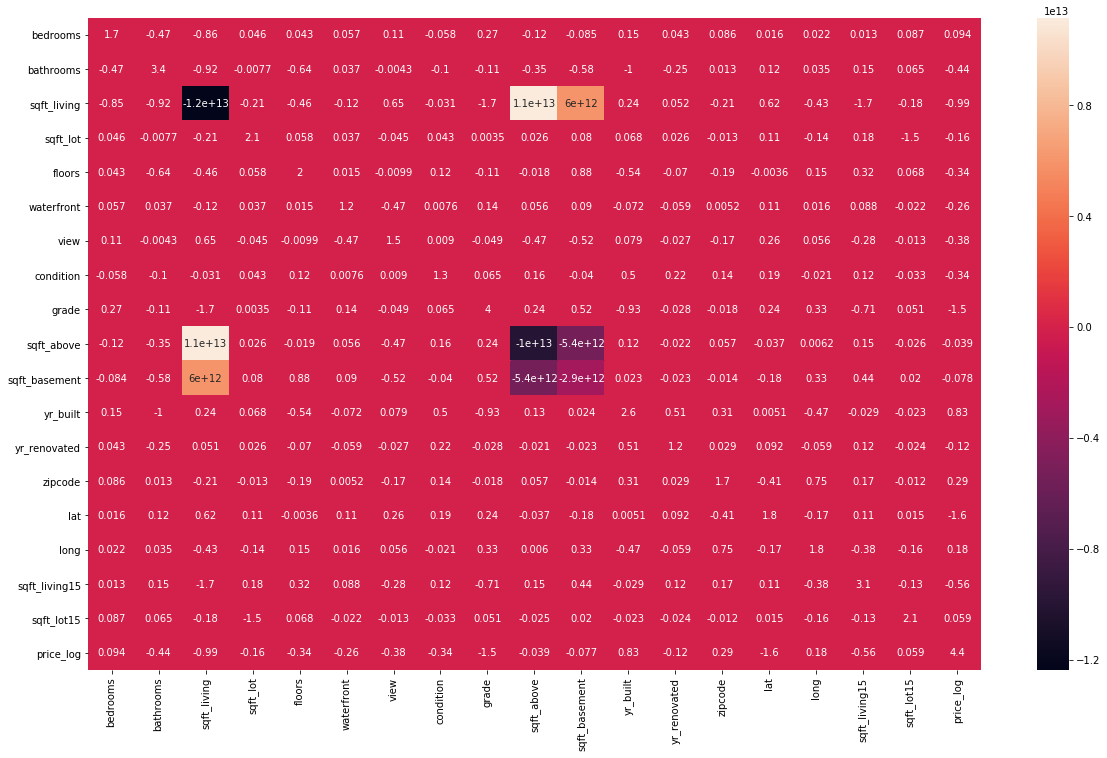

In [0]:
# Creating a heatmap of the vif dataframe
plt.figure(figsize = (20, 12))
sns.heatmap(vif, annot = True)
plt.show()

> The VIF score for each variable is found alongside the downwards sloping diagonal.
Grade and bathroom have a VIF score of 4 which is close to 5. We can dop it and see if it improves

In [0]:
revised = mahao.drop(columns=['grade', 'bathrooms'])

correlations = revised.corr()
vif2 = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)
vif2

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log
bedrooms,1.571916,-8.691406e-01,0.044547,-0.037709,0.052970,0.109079,-0.076115,-1.865234e-01,-1.977539e-01,0.073625,0.011327,0.089329,0.017403,0.005164,0.080165,0.092309,0.134237
sqft_living,-0.870534,-1.240644e+13,-0.213227,-0.691314,-0.051659,0.629683,-0.032532,1.118576e+13,5.978541e+12,-0.453399,-0.031164,-0.219062,0.759853,-0.277400,-2.003865,-0.139937,-1.784334
sqft_lot,0.044547,-2.130952e-01,2.108439,0.056276,0.037199,-0.044966,0.042705,2.560677e-02,7.863190e-02,0.066535,0.025177,-0.013077,0.112768,-0.140301,0.185463,-1.461321,-0.161001
floors,-0.037709,-6.906310e-01,0.056276,1.912088,0.026503,-0.012368,0.098613,-7.742945e-02,7.865242e-01,-0.768902,-0.117965,-0.190983,0.027210,0.167051,0.319869,0.082316,-0.471103
waterfront,0.052970,-5.179622e-02,0.037199,0.026503,1.214599,-0.467939,0.006441,5.253365e-02,7.801696e-02,-0.025153,-0.054772,0.005716,0.097144,0.003430,0.112540,-0.024723,-0.203205
view,0.109079,6.303518e-01,-0.044966,-0.012368,-0.467939,1.468819,0.009681,-4.650226e-01,-5.166523e-01,0.065248,-0.027875,-0.166022,0.263649,0.060195,-0.284321,-0.011903,-0.404622
condition,-0.076115,-3.211436e-02,0.042705,0.098613,0.006441,0.009681,1.271516,1.412370e-01,-6.518884e-02,0.481174,0.209698,0.139801,0.188105,-0.025164,0.134881,-0.031621,-0.326880
sqft_above,-0.187665,1.118576e+13,0.025703,-0.077161,0.052288,-0.464061,0.141623,-1.008518e+13,-5.390305e+12,0.075297,-0.045192,0.059407,-0.038277,-0.008940,0.206849,-0.021763,0.005130
sqft_basement,-0.197706,5.978541e+12,0.078626,0.786582,0.077929,-0.516234,-0.065016,-5.390305e+12,-2.881000e+12,-0.027585,-0.061290,-0.009535,-0.187186,0.295176,0.552441,0.024464,0.045970
yr_built,0.073625,-4.529643e-01,0.066535,-0.768902,-0.025153,0.065248,0.481174,7.490540e-02,-2.779413e-02,2.045695,0.426620,0.310535,0.100335,-0.379784,-0.157106,0.010093,0.316521


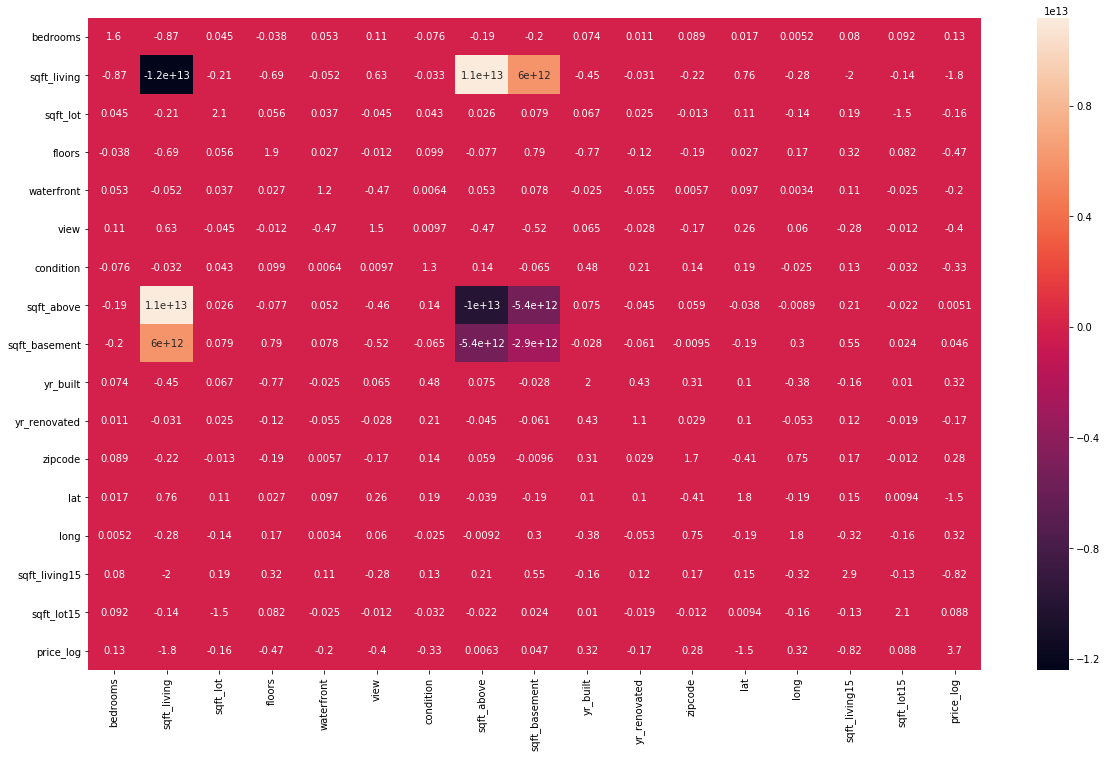

In [0]:
# Creating a heatmap of the vif dataframe
plt.figure(figsize = (20, 12))
sns.heatmap(vif2, annot = True)
plt.show()



> We can see that VIF score has improved on all values



**Multilinear model**

In [0]:
# Set the x and y variables
X = mahao.drop(columns = ['price_log'], axis=1)
y = mahao['price_log']

# Dividing our data into training and test sets
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit our model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
# 
y_pred = lr.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
mahao_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mahao_df.head()

# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19905147794881825
Mean Squared Error: 0.06565793966354594
Root Mean Squared Error: 0.25623805272352884


In [0]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes.
# 
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-1.035193e-02
bathrooms,6.786296e-02
sqft_living,9.428016e-05
sqft_lot,5.317792e-07
floors,7.669768e-02
waterfront,3.888129e-01
view,5.894397e-02
condition,6.340711e-02
grade,1.589778e-01
sqft_above,3.886512e-05


In [0]:
# Test and Training Scores
score = lr.score(X_train, y_train)
score2 = lr.score(X_test, y_test)

print('Training set accuracy: ', '%.2f'%(score))
print('Test set accuracy: ', '%.2f'%(score2))

Training set accuracy:  0.77
Test set accuracy:  0.76


**Hyperparameter tuning to find the optimal parameters for the model**

In [0]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
grid_search = GridSearchCV(estimator=lr, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -0.06430933246729842 and the best parameters are {'fit_intercept': True, 'normalize': False}


**Cross-validation**

In [0]:
# Performing cross validation of ten folds
#
scores = cross_val_score(lr, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 0.064
Standard deviation of the cross validation scores is 0.002


> From the above mean and standard deviation it can be seen the model is fairly stable, as it varies only by 0.002, from the mean

**Checking Heteroskedasticity**

The concept of heteroscedasticity - *the opposite being homoscedasticity* - is used in statistics to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

**1. Using a residual plot**

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

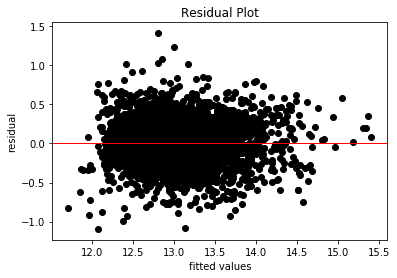

In [0]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()



> Our residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. Let's be thorough though, and perform a heteroskedasticity test using a Bartlett's Test



**2. Using Bartlett's Test**

The test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [0]:
# Performing the barlett's test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  
  print('The variances are homogeneous')

The test result of 1387.38 is less than the critical value of inf
The variances are homogeneous


Thefore the variances are equal, which means that the model is okay and there is no need to reasses

### **Quantile Regression**

Quantile regressions minimize the quantile loss in prediction.

In [0]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg

# Scale our data to enable PCA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
sc = StandardScaler()
y_trainS = sc.fit_transform(y_train.values.reshape(-1,1))
y_testS = sc.transform(y_test.values.reshape(-1,1))

In [0]:
print("mean = " + str(np.mean(X_train[:,4])))
print("std = " + str(np.std(X_train[:,4])))

mean = 1.809042956454369e-17
std = 1.0


**PCA for feature reduction and independence**

Let's put the potential predictors through PCA to create few independent components that could go into the model instead


In [0]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [0]:
print('Variance explained by all components: ' + str(pca.explained_variance_ratio_.sum()))
pca.explained_variance_ratio_

Variance explained by all components: 0.6588061845419465


array([0.29131968, 0.12205914, 0.10220126, 0.07583814, 0.06738797])

In [0]:
principalDf['price_log'] = y_trainS

In [0]:
mod = sm.quantreg('price_log ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              price_log   Pseudo R-squared:               0.4027
Model:                       QuantReg   Bandwidth:                      0.1087
Method:                 Least Squares   Sparsity:                        1.455
Date:                Mon, 27 Jan 2020   No. Observations:                17282
Time:                        07:43:00   Df Residuals:                    17276
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0018      0.006     -0.329      0.742      -0.013       0.009
PrincComp_1     0.2810      0.002    116.246      0.000       0.276       0.286
PrincComp_2     0.3126      0.004     83.709      0.000       0.305       0.320
PrincComp_3    -0.0164      0.004     -4.028   

### **Ridge Regression**

Ridge regression adds penalty equivalent to the square of the magnitude of the coefficients.

In [0]:
from sklearn.linear_model import Ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 4.0}
-0.19509079352754785




> Optimum value of alpha is 4.0



In [0]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [0]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.76


### **Lasso Regression**

Lasso adds penalty equivalent to the absolute value of the sum of coefficients.

In [0]:
# Building the Lasso model. 
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    9.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.19506138381152682


In [0]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.76


### **ElasticNet Regression**
Elastic Net is the combination of both Ridge and Lasso. It adds both the sum of squared coefficients and the absolute sum of the coefficients with the ordinary least square function. 

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
elastic = ElasticNet(normalize=True)

# cross validation
elastic_model_cv = GridSearchCV(estimator = elastic, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

elastic_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
print(elastic_model_cv.best_params_)
print(elastic_model_cv.best_score_)

{'alpha': 0.0001}
-0.222954993596292


In [0]:
# The best hyperparameters was an alpha set to 0.0001
# 
alpha = 0.0001
elastic = ElasticNet(alpha=alpha)

elastic.fit(X_train, y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## **7. Predictions**

In [0]:
# Predictions

# Multilinear reg pred
lin_train_pred = lr.predict(X_train)

# ridge train pred
ridge_train_pred = ridge.predict(X_train)

# lasso train pred
lasso_train_pred = lasso.predict(X_train)

# elastic net train pred
elastic_train_pred = elastic.predict(X_train)

In [0]:
# making predictions on the test set
X_test = scaler.transform(X_test)

# multilinear predictions
lin_pred = lr.predict(X_test)

# ridge predictions
ridge_pred = ridge.predict(X_test)

# lasso predictions
lasso_pred = lasso.predict(X_test)

# elastic predictions
elastic_pred = elastic.predict(X_test)

## **8. Model Evaluation**

In [0]:
from sklearn.metrics import r2_score 

# model evaluation on the training set 
# Multilinear Regression
r2_score(y_train,lin_train_pred)

0.7723845614814435

In [0]:
# model evaluation on the training set 
# Ridge
r2_score(y_train,ridge_train_pred)

0.7723565021939398

In [0]:
# model evaluation on the training set 
# Lasso
r2_score(y_train,lasso_train_pred)

0.7723735462722309

In [0]:
# model evaluation on the training set 
# Elastic Net
r2_score(y_train,elastic_train_pred)

0.7723841516390392